# Try Keras
This is the starter notebook for the [Try Keras](https://www.codingforentrepreneurs.com/projects/try-keras) tutorial series.
[Run on Google Colab](https://colab.research.google.com/github/codingforentrepreneurs/Try-Keras/blob/master/notebooks/Try_Keras_Start_Here.ipynb)

## Download and Unzip our Dataset

We have provided the starter dataset for this series. You can always use your own dataset once you get the basics and you can use a lot of the methods below download and unzip your dataset too.

All datasets are available on [this repo](https://github.com/codingforentrepreneurs/Try-Keras). Datasets were generated using [Tight.ai Desktop](https://tight.ai) _coming soon_.

In [2]:
DATASET_NAME = "hot-dog-v-not-hot-dog"
DATASET_ZIP = f"{DATASET_NAME}.zip"
DATASET_URL = f"https://s3.amazonaws.com/datasets.tight.ai/tutorials/try-keras/{DATASET_ZIP}"

Let's just run a bash script `!` to repeat `echo` the python variable `DATASET_URL` from above by using `$DATASET_URL`.

In [3]:
!echo $DATASET_URL

https://s3.amazonaws.com/datasets.tight.ai/tutorials/try-keras/hot-dog-v-not-hot-dog.zip


Here we'll use a bash script `!` to download the file `wget` and the newest version `-N` using the python variable from above with `$DATASET_URL`.

In [4]:
!wget -N $DATASET_URL

--2020-08-22 19:28:21--  https://s3.amazonaws.com/datasets.tight.ai/tutorials/try-keras/hot-dog-v-not-hot-dog.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.147.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.147.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141058151 (135M) [application/zip]
Saving to: ‘hot-dog-v-not-hot-dog.zip’

hot-dog-v-not-hot-d 100%[===================>] 134.52M  40.8MB/s    in 3.3s    

2020-08-22 19:28:25 (40.8 MB/s) - ‘hot-dog-v-not-hot-dog.zip’ saved [141058151/141058151]



In [5]:
# !unzip -h

Now we'll run a bash script `!` to unzip `!unzip`  and update files (if neccessary) quietly `-uq` from the python variable name `DATASET_NAME` as `$DATASET_NAME` with our destination `-d` being our current directory `.`.

In [6]:
!unzip -uq $DATASET_ZIP -d "."

Now let's review, with a bash script `!`, our current directory `ls` to ensure our zip file `$DATASET_ZIP` was unpacked and our `DATASET_NAME` is visable as a directory:

In [7]:
!ls

hot-dog-v-not-hot-dog  hot-dog-v-not-hot-dog.zip  __MACOSX  sample_data


## Review Dataset

In [8]:
import pathlib
import pandas as pd

In [9]:
BASE_DIR = pathlib.Path().resolve() # os.getcwd()
BASE_DIR

PosixPath('/content')

In [10]:
DATASET_DIR = BASE_DIR / DATASET_NAME
print(DATASET_DIR, DATASET_DIR.exists())

/content/hot-dog-v-not-hot-dog True


In [11]:
# DATASET_DIR = os.path.join(BASE_DIR, DATASET_NAME)
# print(DATASET_DIR, os.path.exists(DATASET_DIR))

In [12]:
DATASET_CSV = DATASET_DIR / 'dataset.csv'

In [13]:
df = pd.read_csv(DATASET_CSV)
df.head()

,path,extension,height,width,tags,removed,timestamp
0,data/1.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09
1,data/2.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09
2,data/3.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09
3,data/4.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09
4,data/5.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09


In [14]:
df.shape

(731, 7)

#### Create the *Local* Path Column

In [15]:
df['local_path'] = df['path']
df.head()

,path,extension,height,width,tags,removed,timestamp,local_path
0,data/1.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,data/1.jpg
1,data/2.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,data/2.jpg
2,data/3.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,data/3.jpg
3,data/4.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,data/4.jpg
4,data/5.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,data/5.jpg


In [16]:
# def change_to_abs_path(row_val):
#   return str(DATASET_DIR / row_val)
df['local_path'] = df['local_path'].apply(lambda x: str(DATASET_DIR / x))

In [17]:
df.head()

,path,extension,height,width,tags,removed,timestamp,local_path
0,data/1.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/1.jpg
1,data/2.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/2.jpg
2,data/3.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/3.jpg
3,data/4.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/4.jpg
4,data/5.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/5.jpg


#### Preview Random Image

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df.tags.value_counts()

Not Hot Dog    440
Hot Dog        291
Name: tags, dtype: int64

In [20]:
random_row = df.sample()
random_row

,path,extension,height,width,tags,removed,timestamp,local_path
671,data/679.jpg,.jpg,500.0,500.0,Not Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/679.jpg


In [21]:
local_random_img_path = random_row['local_path'].values[0]
local_random_img_tag = random_row['tags'].values[0]

print(local_random_img_path, local_random_img_tag)

/content/hot-dog-v-not-hot-dog/data/679.jpg Not Hot Dog


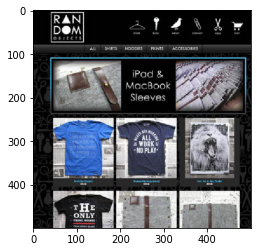

Not Hot Dog


In [22]:
pil_img = Image.open(local_random_img_path)
img_array = np.asarray(pil_img)
plt.imshow(img_array)
plt.show()
print(local_random_img_tag)

In [23]:
def preview_img_randomly():
    random_row = df.sample()
    local_random_img_path = random_row['local_path'].values[0]
    local_random_img_tag = random_row['tags'].values[0]
    pil_img = Image.open(local_random_img_path)
    img_array = np.asarray(pil_img)
    print(local_random_img_tag)
    plt.imshow(img_array)
    plt.show()
    

Not Hot Dog


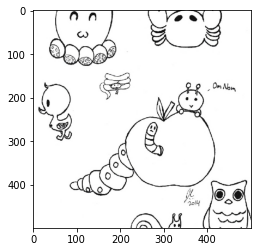

Not Hot Dog


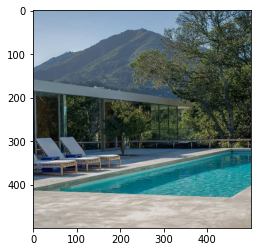

Hot Dog


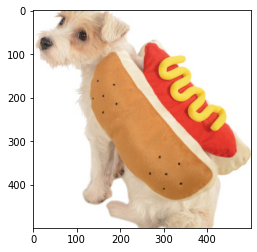

Hot Dog


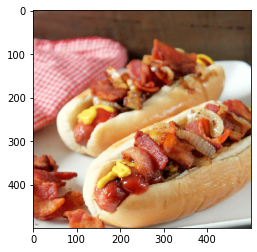

Not Hot Dog


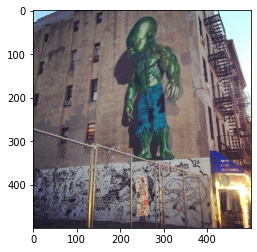

In [24]:
for i in range(5):
  preview_img_randomly()

## Split Dataset

In [25]:
df.head()

,path,extension,height,width,tags,removed,timestamp,local_path
0,data/1.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/1.jpg
1,data/2.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/2.jpg
2,data/3.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/3.jpg
3,data/4.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/4.jpg
4,data/5.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/5.jpg


In [26]:
df.tags.value_counts()

Not Hot Dog    440
Hot Dog        291
Name: tags, dtype: int64

In [27]:
import math
label_col = 'tags' # output -> y
x_col = 'local_path' # input -> X

In [28]:
dfs_for_train = []
dfs_for_valid = []
val_counts = df[label_col].value_counts()
split_percent = 0.25

for label, count in val_counts.items():
  # print(label, count)
  lower_half = math.floor(count * (1 - split_percent))
  upper_half = math.ceil(count * (split_percent))
  # print(lower_half, upper_half)
  sub_df = df.copy()
  sub_df = sub_df[sub_df[label_col]==label] # all matches of "Hot Dog"
  sub_df = sub_df.sample(frac=1).reset_index(drop=True)
  sub_train_df = sub_df[:lower_half]
  sub_valid_df = sub_df[lower_half:]
  dfs_for_train.append(sub_train_df)
  dfs_for_valid.append(sub_valid_df)

In [29]:
df_train = pd.concat(dfs_for_train)
df_valid = pd.concat(dfs_for_valid)

In [30]:
df_train.tail(n=10)

,path,extension,height,width,tags,removed,timestamp,local_path
208,data/162.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/162.jpg
209,data/101.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/101.jpg
210,data/289.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/289.jpg
211,data/16.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/16.jpg
212,data/17.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/17.jpg
213,data/253.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/253.jpg
214,data/236.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/236.jpg
215,data/14.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/14.jpg
216,data/132.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/132.jpg
217,data/115.jpg,.jpg,500.0,500.0,Hot Dog,0,1.590598e+09,/content/hot-dog-v-not-hot-dog/data/115.jpg


## What's in the Data?

In [31]:
import numpy as np
import matplotlib.pyplot as plt


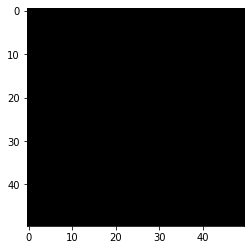

In [32]:
my_array = np.zeros((50, 50, 3))  # 50 pixels x 50 pixels x 3 color values (RGB, BGR)
plt.imshow(my_array)
plt.show()

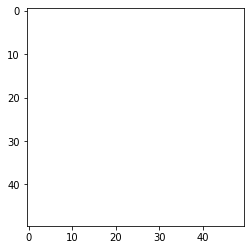

In [33]:
my_other_array = my_array + 1
plt.imshow(my_other_array)
plt.show()

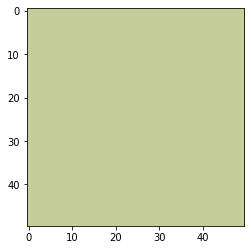

In [34]:
import random
random_rgb = [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)] # RGB
my_other_other_array = my_other_array * (np.array(random_rgb) / 255.0)
plt.imshow(my_other_other_array)
plt.show()

In [35]:
my_other_other_array

array([[[0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314],
        ...,
        [0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314]],

       [[0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314],
        ...,
        [0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314]],

       [[0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314],
        ...,
        [0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314]],

       ...,

       [[0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0.80392157, 0.60784314],
        [0.77254902, 0

In [36]:
500 * 500 * 3 * 10000

7500000000

## Using Pre-Trained Model

https://keras.io/api/applications/

In [37]:
def get_img_path_randomly():
    random_row = df.sample()
    local_random_img_path = random_row['local_path'].values[0]
    local_random_img_tag = random_row['tags'].values[0]
    pil_img = Image.open(local_random_img_path)
    img_array = np.asarray(pil_img)
    print(local_random_img_tag)
    plt.imshow(img_array)
    plt.show()
    return local_random_img_path

Not Hot Dog


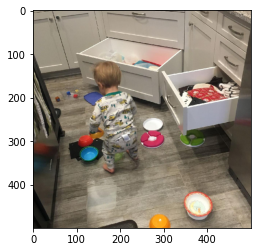

In [38]:
img_path = get_img_path_randomly()

In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

102973440/102967424 [==============================] - 2s 0us/step


In [40]:
preds = model.predict(x)

In [41]:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n04070727', 'refrigerator', 0.18691725), ('n03761084', 'microwave', 0.0658234), ('n02808440', 'bathtub', 0.06509897)]


In [42]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## Our Model
Convolutional Neural Network (CNN)
- Code [Ref](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

In [43]:
def predict(img_path):
  # some prediction
  return "hot dog" # or "not hot dog" 39%

In [44]:
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [45]:
img_width, img_height = 224, 224
output_classes = 2

In [46]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(img_width, img_height ,3)))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(output_classes, activation='softmax'))

model.compile(RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 64)      1

## Image Preprocessing Data Generators

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
x_col = 'local_path'
y_col = 'tags'

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col=x_col,
    y_col=y_col,
    class_mode='categorical',
    target_size = (img_width, img_height),
    batch_size=32
)


Found 547 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="local_path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [49]:
valid_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = valid_datagen.flow_from_dataframe(
    dataframe=df_valid,
    x_col=x_col,
    y_col=y_col,
    class_mode='categorical',
    target_size = (img_width, img_height),
    batch_size=32
)

Found 182 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="local_path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


## Train our Model

In [50]:
EPOCHS = 10
steps_per_epoch = training_generator.n // training_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

In [51]:
model.fit(
    x=training_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

# model.fit_generator(generator=train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=valid_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=10)

Epoch 1/10
17/17 [==============================] - 10s 585ms/step - loss: 2.2922 - accuracy: 0.5476 - val_loss: 0.7232 - val_accuracy: 0.4313
Epoch 2/10
17/17 [==============================] - 10s 561ms/step - loss: 0.5480 - accuracy: 0.7262 - val_loss: 0.5559 - val_accuracy: 0.6625
Epoch 3/10
17/17 [==============================] - 9s 549ms/step - loss: 0.4255 - accuracy: 0.7981 - val_loss: 0.3915 - val_accuracy: 0.8625
Epoch 4/10
17/17 [==============================] - 9s 550ms/step - loss: 0.4151 - accuracy: 0.8233 - val_loss: 0.3509 - val_accuracy: 0.8938
Epoch 5/10
17/17 [==============================] - 9s 555ms/step - loss: 0.3987 - accuracy: 0.8350 - val_loss: 0.3454 - val_accuracy: 0.9062
Epoch 6/10
17/17 [==============================] - 9s 546ms/step - loss: 0.3925 - accuracy: 0.8447 - val_loss: 0.3426 - val_accuracy: 0.8750
Epoch 7/10
17/17 [==============================] - 10s 564ms/step - loss: 0.3344 - accuracy: 0.8713 - val_loss: 0.3260 - val_accuracy: 0.8938
Epo

## Exporting Model (Saving)

#### Save To Colab
Remember, colab is ephemeral so files saved here will only be available temporarily.

In [52]:
model.save('hotdog-v-not-hot-dog.h5')

#### Save To Google Drive


In [54]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [55]:
DRIVE_ROOT_PATH = BASE_DIR / "drive" / "My Drive"
DRIVE_ROOT_PATH.exists()

True

In [56]:
output_project_dir = DRIVE_ROOT_PATH / "try-keras" / "projects" / "hot-dog-v-not-hot-dog"
output_project_dir.mkdir(parents=True, exist_ok=True)

In [57]:
model.save(output_project_dir / 'hotdog-v-not-hot-dog.h5')

In [58]:
# s3, google storage

## Prediction on Custom Trained Model

In [59]:
def get_img_randomly():
    random_row = df.sample()
    local_random_img_path = random_row['local_path'].values[0]
    local_random_img_tag = random_row['tags'].values[0]
    pil_img = Image.open(local_random_img_path)
    img_array = np.asarray(pil_img)
    print(local_random_img_tag)
    plt.imshow(img_array)
    plt.show()
    return local_random_img_path, local_random_img_tag

Hot Dog


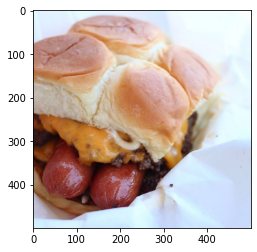

In [60]:
local_random_img_path, local_random_img_tag = get_img_randomly()

In [61]:
from keras.preprocessing import image as k_image

img = k_image.load_img(
    local_random_img_path,
    target_size = (img_width, img_height)
)
img_array = k_image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)
img_array /= 255.0

predictions = model.predict(img_array)
print(predictions)

[[0.7232664 0.2767336]]


In [62]:
metadata = {
    "classes": training_generator.class_indices,
    "index_vals": {v:k for k,v in training_generator.class_indices.items()},
    "image": {
        "width": img_width,
        "height": img_height
    }
}
metadata

{'classes': {'Hot Dog': 0, 'Not Hot Dog': 1},
 'image': {'height': 224, 'width': 224},
 'index_vals': {0: 'Hot Dog', 1: 'Not Hot Dog'}}

## Model Prediction Function

In [63]:
def preds_to_dict(predictions):
  final_preds = list(predictions[0])
  preds_dict = {}
  for i, val in enumerate(final_preds):
      label_name = metadata['index_vals'][i]
      preds_dict[label_name] = val
  return preds_dict

def predict(img_path):
  image_data = metadata.get('image') or {}
  img_width = image_data.get("width") or 224
  img_height = image_data.get("height") or 224
  img = k_image.load_img(
      img_path,
      target_size = (img_width, img_height)
  )
  img_array = k_image.img_to_array(img)
  img_array = np.expand_dims(img_array, 0)
  img_array /= 255.0
  predictions = model.predict(img_array)
  return preds_to_dict(predictions)

Not Hot Dog


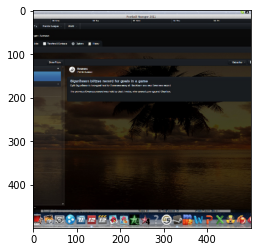

In [64]:
local_random_img_path, local_random_img_tag = get_img_randomly()

In [65]:
predict(local_random_img_path)

{'Hot Dog': 0.1448822, 'Not Hot Dog': 0.8551178}

## Storing Model Metadata

In [66]:
metadata = {
    "classes": training_generator.class_indices,
    "index_vals": {v:k for k,v in training_generator.class_indices.items()},
    "image": {
        "width": img_width,
        "height": img_height
    }
}
output_project_dir

PosixPath('/content/drive/My Drive/try-keras/projects/hot-dog-v-not-hot-dog')

In [67]:
import json

with open(output_project_dir / 'metadata.json', 'w') as f:
    f.write(json.dumps(metadata, indent=4))

In [68]:

with open('metadata.json', 'w') as f:
    f.write(json.dumps(metadata, indent=4))

In [69]:
with open(output_project_dir / 'metadata.json', 'r') as f:
    print(f.read())

{
    "classes": {
        "Hot Dog": 0,
        "Not Hot Dog": 1
    },
    "index_vals": {
        "0": "Hot Dog",
        "1": "Not Hot Dog"
    },
    "image": {
        "width": 224,
        "height": 224
    }
}


## Create a Reusable Module for Prediction (Inference)

In [70]:
%%writefile predict.py

import sys
import json
import numpy as np
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image as k_image
# from keras.models import load_model 
# from keras.preprocessing import image as k_image

MODEL_OBJ = None
MODEL_METADATA = {}

def load_my_model():
    global MODEL_OBJ
    global MODEL_METADATA
    MODEL_OBJ = load_model('hotdog-v-not-hot-dog.h5', compile=False)
    with open('metadata.json', 'r') as f:
        MODEL_METADATA = json.loads(f.read())
    return MODEL_OBJ, MODEL_METADATA

def preds_to_dict(predictions, metadata={}):
  final_preds = list(predictions[0])
  preds_dict = {}
  for i, val in enumerate(final_preds):
      label_name = metadata['index_vals'][f"{i}"]
      preds_dict[label_name] = val
  return preds_dict

def predict(img_path):
  global MODEL_OBJ
  global MODEL_METADATA
  if MODEL_OBJ == None:
     MODEL_OBJ, MODEL_METADATA = load_my_model()
  print(MODEL_OBJ, MODEL_METADATA)
  image_data = MODEL_METADATA.get('image') or {}
  img_width = image_data.get("width") or 224
  img_height = image_data.get("height") or 224
  img = k_image.load_img(
      img_path,
      target_size = (img_width, img_height)
  )
  img_array = k_image.img_to_array(img)
  img_array = np.expand_dims(img_array, 0)
  img_array /= 255.0
  predictions = MODEL_OBJ.predict(img_array)
  return preds_to_dict(predictions, metadata=MODEL_METADATA)


if __name__ == "__main__":
     local_img_path = sys.argv[1]
     if local_img_path:
        my_pred = predict(local_img_path)
        print(my_pred)

Writing predict.py


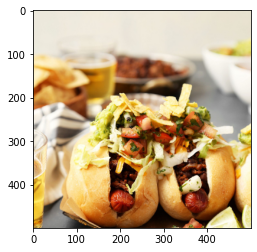

In [71]:
test_img = pathlib.Path('hot-dog-v-not-hot-dog') / "data" / "1.jpg"
img = Image.open(test_img)
plt.imshow(img)
plt.show()

In [72]:
!echo $test_img

hot-dog-v-not-hot-dog/data/1.jpg


In [73]:
!python predict.py $test_img

2020-08-22 19:33:17.759775: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-22 19:33:19.270769: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-22 19:33:19.276838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-22 19:33:19.277485: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-08-22 19:33:19.277547: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-22 19:33:19.279975: I tensorflow/stream_executor/platform/default

## Create a Reusable Training Module

In [ ]:
# !jupyter nbconvert --to notebook --execute "Try Keras.ipynb"

In [76]:
%%writefile train.py

import pathlib
import pandas as pd
import math
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop


BASE_DIR = pathlib.Path().resolve()
DATASET_NAME = "hot-dog-v-not-hot-dog"
DATASET_DIR = BASE_DIR / DATASET_NAME
DATASET_CSV = DATASET_DIR / 'dataset.csv'

def load_dataframe():
  assert(DATASET_DIR.exists() == True)
  df = pd.read_csv(DATASET_CSV)
  return df


def df_to_localized_path(df, path_src='path', path_dest='local_path'):
  if path_src in df.columns:
    df[path_dest] = df[path_src]
    df[path_dest] = df[path_dest].apply(lambda x: str(DATASET_DIR / x))
  return df

def split_dataframe(df, label_col='tags', split_percent = 0.25):
  dfs_for_train = []
  dfs_for_valid = []
  val_counts = df[label_col].value_counts()
  for label, count in val_counts.items():
    lower_half = math.floor(count * (1 - split_percent))
    upper_half = math.ceil(count * (split_percent))
    sub_df = df.copy()
    sub_df = sub_df[sub_df[label_col]==label]
    sub_df = sub_df.sample(frac=1).reset_index(drop=True)
    sub_train_df = sub_df[:lower_half]
    sub_valid_df = sub_df[lower_half:]
    dfs_for_train.append(sub_train_df)
    dfs_for_valid.append(sub_valid_df)
  df_train = pd.concat(dfs_for_train)
  df_valid = pd.concat(dfs_for_valid)
  return df_train, df_valid

def get_generators(df_train, df_valid,
      x_col = 'local_path', 
      y_col = 'tags',
      batch_size=32,
      target_size=(224, 224)
    ):
    train_datagen = ImageDataGenerator(
      rescale=1.0/255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
    )
    training_generator = train_datagen.flow_from_dataframe(
      dataframe=df_train,
        x_col=x_col,
        y_col=y_col,
        class_mode='categorical',
        target_size = target_size,
        batch_size=batch_size
    )
    valid_datagen = ImageDataGenerator(rescale=1.0/255)

    validation_generator = valid_datagen.flow_from_dataframe(
        dataframe=df_valid,
        x_col=x_col,
        y_col=y_col,
        class_mode='categorical',
        target_size = target_size,
        batch_size = batch_size
    )
    return training_generator, validation_generator


def get_model(output_classes=2, img_width=224, img_height=224):
    # CNN -> Image Classification
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                    input_shape=(img_width, img_height ,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_classes, activation='softmax'))
    model.compile(RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
    return model


def run(
      x_col='local_path', 
      y_col='tags', 
      epochs=10,
      model_output='model.h5',
      path_src='path', 
      img_width = 224,
      img_height = 224,
      batch_size = 32,
      split_percent=0.25,
      localize_path=True):
  df = load_dataframe()
  if localize_path:
      df = df_to_localized_path(df, path_src=path_src, path_dest=x_col)
  val_counts = df[y_col].value_counts()
  df_train, df_valid = split_dataframe(df, label_col=y_col, split_percent=split_percent)
  t_gen, v_gen = get_generators(df_train, df_valid,
          x_col = x_col, 
          y_col =y_col,
          batch_size=batch_size, 
          target_size=(img_width, img_height)
      )
  model = get_model(output_classes=len(val_counts.keys()), img_width=img_width, img_height=img_height)
  steps_per_epoch = t_gen.n // t_gen.batch_size
  validation_steps = v_gen.n // v_gen.batch_size
  model.fit(
      x=t_gen,
      steps_per_epoch=steps_per_epoch,
      validation_data=v_gen,
      validation_steps=validation_steps,
      epochs=epochs
  )
  model.save(model_output)
  metadata = {
    "classes": t_gen.class_indices,
    "index_vals": {v:k for k,v in t_gen.class_indices.items()},
    "image": {
        "width": img_width,
        "height": img_height
      }
  }
  metadata_output = BASE_DIR / 'metadata.json'
  metadata_output.write_text(json.dumps(metadata))
  return f"Saved to {model_output}"

if __name__ == "__main__":
    model_output_path =  run(
        x_col='local_path', 
        y_col='tags', 
        epochs=10,
        model_output='model.h5',
        path_src='path', 
        img_width = 224,
        img_height = 224,
        batch_size = 32,
        split_percent=0.25,
        localize_path=True)
    print(model_output_path)

Overwriting train.py


In [77]:
!python train.py

2020-08-22 20:00:17.093478: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="local_path". These filename(s) will be ignored.
  .format(n_invalid, x_col)
Found 547 validated image filenames belonging to 2 classes.
Found 182 validated image filenames belonging to 2 classes.
2020-08-22 20:00:18.290646: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-22 20:00:18.295642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-22 20:00:18.296082: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: T

## Export Entire Project to Google Drive

In [96]:
import shutil

# from google.colab import drive
# drive.mount('/content/drive')

DRIVE_ROOT_PATH = BASE_DIR / "drive" / "My Drive"
PROJECT_OUTPUT_DIR = DRIVE_ROOT_PATH / "try-keras" / "projects" / "hot-dog-v-not-hot-dog"
PROJECT_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)


SOURCE_DIR = BASE_DIR
SOURCE_PATHS = [x for x in list(SOURCE_DIR.glob("**/*")) if x.is_file()]
SOURCE_PATHS = [x for x in SOURCE_PATHS if not str(x).startswith("/content/drive")]
SOURCE_PATHS = [x for x in SOURCE_PATHS if not str(x).startswith("/content/__MACOSX")]
SOURCE_PATHS = [x for x in SOURCE_PATHS if not str(x).startswith("/content/.config/")]
SOURCE_PATHS = [x for x in SOURCE_PATHS if not str(x).startswith("/content/sample_data/")]

for f_path in SOURCE_PATHS:
  path_relative_to_parent = f_path.relative_to(SOURCE_DIR)
  ouput_path = PROJECT_OUTPUT_DIR / path_relative_to_parent # filepath
  ouput_path.parent.mkdir(parents=True, exist_ok=True)
  if f_path.is_file():
    shutil.copy(f_path, ouput_path)                